In [1]:
%matplotlib inline
import numpy
import pandas
import seaborn
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10, 5)

In [2]:
"""
Notes and formulae for this can be found in evernote.

TODO: Annotate the functions here.


Run updated for beta_0.
"""
def sample_beta_0(x, y, beta_1, mu_0, tau_0, tau):
    assert len(x) == len(y)
    N = len(y)
    precision = tau_0 + tau * N
    mean = tau_0 * mu_0 + tau * numpy.sum(y - beta_1 * x)
    mean /= precision
    return numpy.random.normal(mean, 1 / numpy.sqrt(precision))

In [3]:
def sample_beta_1(x, y, beta_0, mu_1, tau, tau_1):
    assert len(x) == len(y)
    N = len(y)
    precision = tau_1 + tau * numpy.sum(x * x)
    mean =  tau_1 * mu_1 + tau * numpy.sum((y - beta_0) * x)
    mean /= precision
    return numpy.random.normal(mean, 1 / numpy.sqrt(precision))

In [4]:
def sample_tau(x, y, beta_0, beta_1, alpha, beta):
    N = len(y)
    
    # The tutorial we followed for deriving these formulae had this calculation wrong in code. 
    # The calculation of alpha_new was "alpha + N / 2". 
    # Looks like the author may have neglected the order of operations. 
    alpha_new = (alpha + N) / 2
    residual = y - beta_0 - beta_1 * x
    beta_new = beta + numpy.sum(residual * residual) / 2
    return numpy.random.gamma(alpha_new, 1 / beta_new)

Text(0, 0.5, 'y')

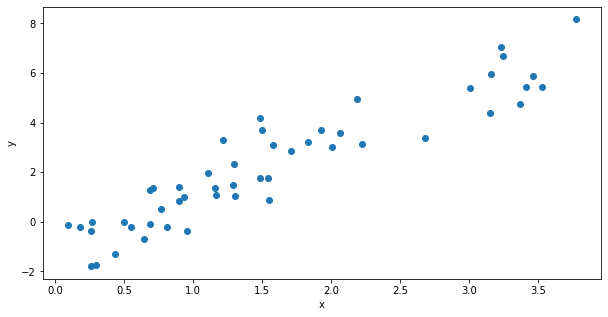

In [5]:
beta_0_true = -1
beta_1_true = 2
tau_true = 1
N = 50
x = numpy.random.uniform(low=0, high=4, size=N)
y = numpy.random.normal(beta_0_true + beta_1_true * x, 1 / numpy.sqrt(tau_true))

synth_plot = pyplot.plot(x, y, "o")
pyplot.xlabel("x")
pyplot.ylabel("y")

In [6]:
# Specify initial values
init_values = {
    "beta_0" : 0,
    "beta_1" : 0,
    "tau" : 2}

# Specify hyper-parameters
hyper_params = {
    "mu_0" : 0,
    "tau_0" : 1,
    "mu_1" : 0,
    "tau_1" : 1,
    "alpha" : 2,
    "beta" : 1}

In [7]:
"""
TODO: Annotate this algorithm with the Gibbs sampling steps (found in evernote).
"""
def gibbs_sampler(x, y, iterations, init_values, hyper_params):
    assert len(x) == len(y)
    beta_0 = init_values["beta_0"]
    beta_1 = init_values["beta_1"]
    tau = init_values["tau"]
    
    # trace to store values of beta_0, beta_1, tau.     
    tracer = numpy.zeros((iterations, 3))
      
    for it in range(iterations):
        # Method signature: sample_beta_0(x, y, beta_1, mu_0, tau_0, tau)
        beta_0 = sample_beta_0(x, y, beta_1, hyper_params["mu_0"], hyper_params["tau_0"], tau)
        # Method signature: (x, y, beta_0, mu_1, tau, tau_1)
        beta_1 = sample_beta_1(x, y, beta_0, hyper_params["mu_1"], tau, hyper_params["tau_1"])
        # Method signature: (x, y, beta_0, beta_1, alpha, beta)
        tau = sample_tau(x, y, beta_0, beta_1, hyper_params["alpha"], hyper_params["beta"])
        tracer[it,:] = numpy.array((beta_0, beta_1, tau))
    
    tracer = pandas.DataFrame(tracer)
    tracer.columns = ["beta_0", "beta_1", "tau"]
    return tracer

In [8]:
iterations = 1000
trace = gibbs_sampler(x, y, iterations, init_values, hyper_params)

Text(0, 0.5, 'Parameter value')

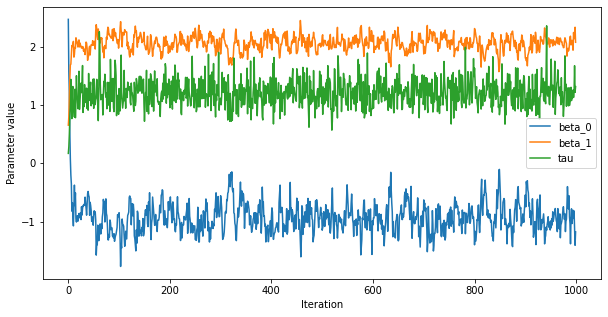

In [9]:
tracer_plot = trace.plot()
tracer_plot.set_xlabel("Iteration")
tracer_plot.set_ylabel("Parameter value")